# **Project Name** - DeepCSAT – Ecommerce Customer Satisfaction Score Prediction

#### **Project Type-** ANN, Deep Learning
#### **Contribution-** Individual
#### **Name-** Ayush Singh

# Problem Statement

The goal of this project is to design an automated system that accurately predicts Customer Satisfaction (CSAT) scores for e-commerce support interactions using historical service data. By leveraging deep learning methods, the project aims to identify key factors driving customer satisfaction and provide actionable insights for improving service quality and operational efficiency.

# Project Summary

This project focuses on building an end-to-end deep learning solution to predict Customer Satisfaction (CSAT) scores from e-commerce support data. It involves data preprocessing through encoding and scaling, neural network modeling, and hyperparameter optimization for performance improvements. The trained model is deployed via a FastAPI endpoint, allowing for real-time CSAT predictions from encoded interaction data. The workflow is designed to deliver actionable insights into factors influencing customer satisfaction, enabling effective operational enhancements and user experience monitoring through seamless integration with dashboard interfaces such as Streamlit.

# Github Link

https://github.com/AyushSinghRana15/cast-score-prediction.git

In [58]:
import pandas as pd

In [59]:
df= pd.read_csv("eCommerce_Customer_support_data.csv")

In [60]:
df.head(10)

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5
5,1cfde5b9-6112-44fc-8f3b-892196137a62,Email,Returns,Fraudulent User,NaN,a2938961-2833-45f1-83d6-678d9555c603,NaN,01/08/2023 15:13,01/08/2023 18:39,01-Aug-23,NaN,NaN,NaN,NaN,Desiree Newton,Emma Park,John Smith,0-30,Morning,5
6,11a3ffd8-1d6b-4806-b198-c60b5934c9bc,Outcall,Product Queries,Product Specific Information,NaN,bfcb562b-9a2f-4cca-aa79-fd4e2952f901,NaN,01/08/2023 15:31,01/08/2023 23:52,01-Aug-23,NaN,NaN,NaN,NaN,Shannon Hicks,Aiden Patel,Olivia Tan,>90,Morning,5
7,372b51a5-fa19-4a31-a4b8-a21de117d75e,Inbound,Returns,Exchange / Replacement,Very good,88537e0b-5ffa-43f9-bbe2-fe57a0f4e4ae,NaN,01/08/2023 16:17,01/08/2023 16:23,01-Aug-23,NaN,NaN,NaN,NaN,Laura Smith,Evelyn Kimura,Jennifer Nguyen,On Job Training,Evening,5
8,6e4413db-4e16-42fc-ac92-2f402e3df03c,Inbound,Returns,Missing,Shopzilla app and it's all coustomer care serv...,e6be9713-13c3-493c-8a91-2137cbbfa7e6,NaN,01/08/2023 21:03,01/08/2023 21:07,01-Aug-23,NaN,NaN,NaN,NaN,David Smith,Nathan Patel,John Smith,>90,Split,5
9,b0a65350-64a5-4603-8b9a-a24a4a145d08,Inbound,Shopzilla Related,General Enquiry,NaN,c7caa804-2525-499e-b202-4c781cb68974,NaN,01/08/2023 23:31,01/08/2023 23:36,01-Aug-23,NaN,NaN,NaN,NaN,Tabitha Ayala,Amelia Tanaka,Michael Lee,31-60,Evening,5


In [61]:
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [63]:
df.describe()

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


In [64]:
#Drop columns with excessive missing values
min_non_null = int(0.95 * len(df))  # keep columns with at least 95% non-null values
df = df.loc[:, df.notnull().sum() > min_non_null]

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unique id             85907 non-null  object
 1   channel_name          85907 non-null  object
 2   category              85907 non-null  object
 3   Sub-category          85907 non-null  object
 4   Issue_reported at     85907 non-null  object
 5   issue_responded       85907 non-null  object
 6   Survey_response_Date  85907 non-null  object
 7   Agent_name            85907 non-null  object
 8   Supervisor            85907 non-null  object
 9   Manager               85907 non-null  object
 10  Tenure Bucket         85907 non-null  object
 11  Agent Shift           85907 non-null  object
 12  CSAT Score            85907 non-null  int64 
dtypes: int64(1), object(12)
memory usage: 8.5+ MB


In [66]:
df.isnull().sum()

Unique id               0
channel_name            0
category                0
Sub-category            0
Issue_reported at       0
issue_responded         0
Survey_response_Date    0
Agent_name              0
Supervisor              0
Manager                 0
Tenure Bucket           0
Agent Shift             0
CSAT Score              0
dtype: int64

In [67]:
#All null values are removed

In [68]:
# Convert date/time columns to proper datetime format
datetime_format = '%Y-%m-%d %H:%M:%S'
datetime_cols = ['Issue_reported at', 'issue_responded', 'Survey_response_Date']
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], format=datetime_format, errors='coerce')

# Standardize string columns: strip whitespace and convert to lower case
string_cols = [
    'Unique id', 'channel_name', 'category', 'Sub-category',
    'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift'
]
for col in string_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

# Remove duplicate entries across all columns
df = df.drop_duplicates()

# Ensure CSAT Score is of integer type
df['CSAT Score'] = pd.to_numeric(df['CSAT Score'], errors='coerce')

# Reset the index for tidiness
df = df.reset_index(drop=True)

# Quickly inspect the cleaned DataFrame
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unique id             85907 non-null  object        
 1   channel_name          85907 non-null  object        
 2   category              85907 non-null  object        
 3   Sub-category          85907 non-null  object        
 4   Issue_reported at     0 non-null      datetime64[ns]
 5   issue_responded       0 non-null      datetime64[ns]
 6   Survey_response_Date  0 non-null      datetime64[ns]
 7   Agent_name            85907 non-null  object        
 8   Supervisor            85907 non-null  object        
 9   Manager               85907 non-null  object        
 10  Tenure Bucket         85907 non-null  object        
 11  Agent Shift           85907 non-null  object        
 12  CSAT Score            85907 non-null  int64         
dtypes: datetime64[ns

# EDA

In [69]:
# Summary statistics for numeric columns
print(df['CSAT Score'].describe())

count    85907.000000
mean         4.242157
std          1.378903
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: CSAT Score, dtype: float64


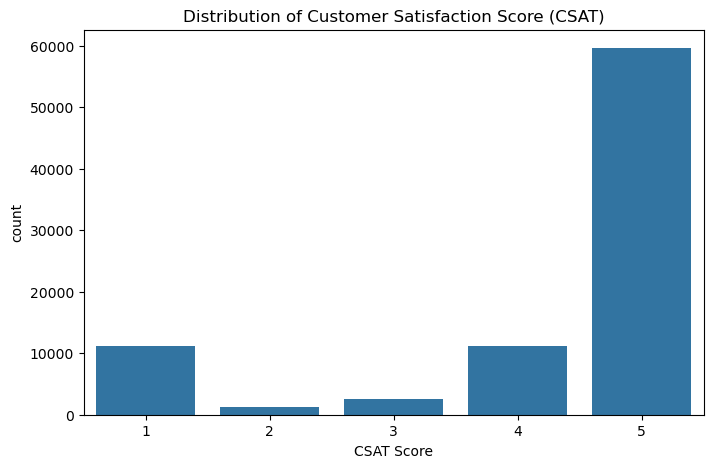

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of CSAT Score
plt.figure(figsize=(8, 5))
sns.countplot(x='CSAT Score', data=df)
plt.title('Distribution of Customer Satisfaction Score (CSAT)')
plt.show()

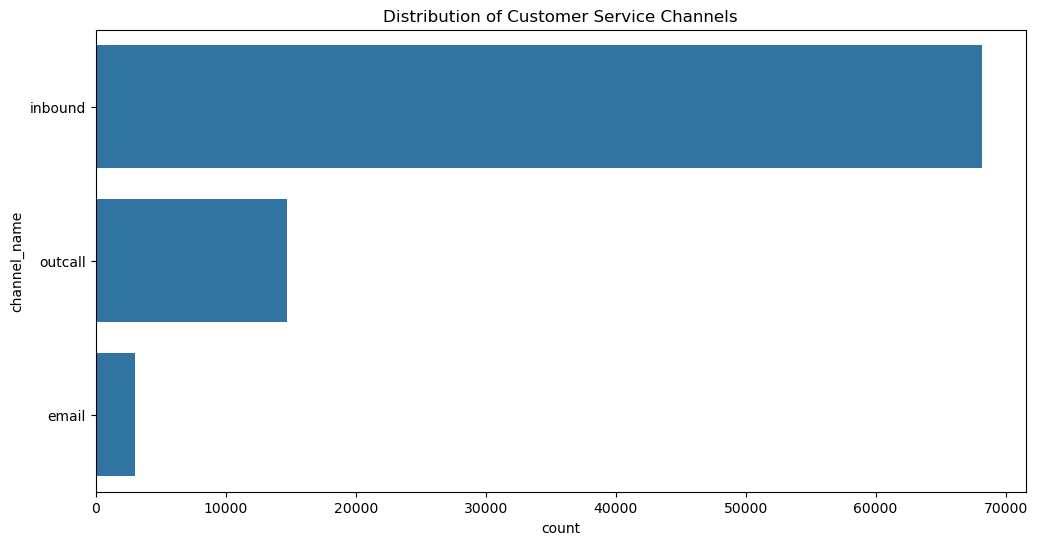

In [71]:
# Count of top categories in 'channel_name' and 'category'
plt.figure(figsize=(12, 6))
sns.countplot(y='channel_name', data=df, order=df['channel_name'].value_counts().index)
plt.title('Distribution of Customer Service Channels')
plt.show()

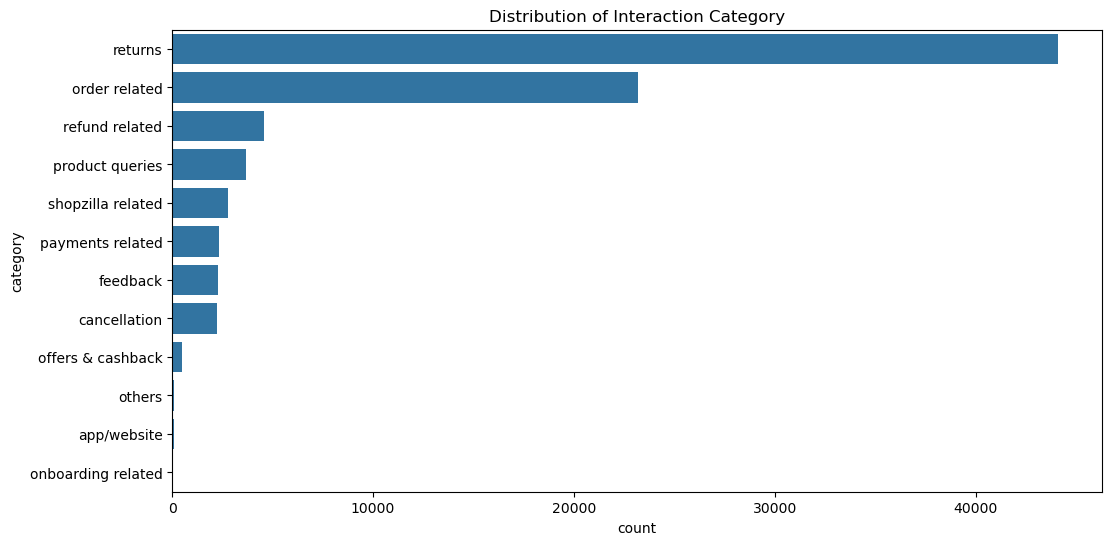

In [72]:
plt.figure(figsize=(12, 6))
sns.countplot(y='category', data=df, order=df['category'].value_counts().index)
plt.title('Distribution of Interaction Category')
plt.show()


In [73]:
# Calculate response time in minutes (difference between issue_responded and Issue_reported at)
df['response_time_min'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 60

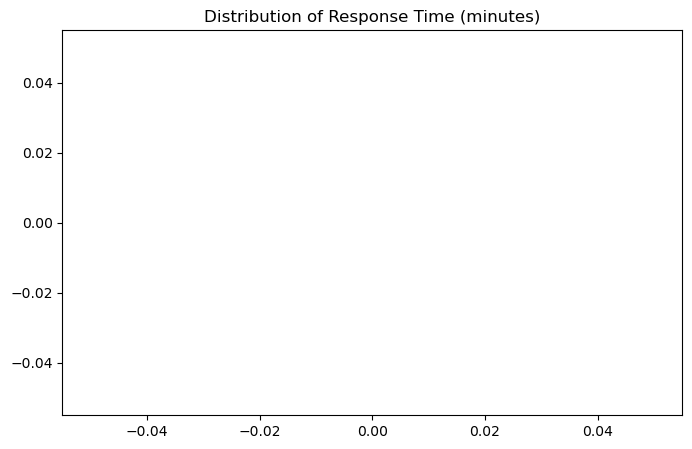

In [74]:
# Distribution of response time (filtering non-null)
plt.figure(figsize=(8, 5))
sns.histplot(df['response_time_min'].dropna(), bins=50, kde=True)
plt.title('Distribution of Response Time (minutes)')
plt.show()

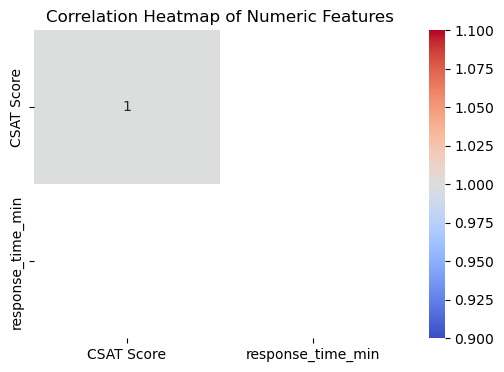

In [75]:
# Correlation heatmap of numeric features including response_time_min and CSAT Score
numeric_cols = ['CSAT Score', 'response_time_min']
plt.figure(figsize=(6, 4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Feature Engineering

In [76]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [77]:
# Create time difference between Survey_response_Date and Issue_reported at
df['survey_to_issue_min'] = (df['Survey_response_Date'] - df['Issue_reported at']).dt.total_seconds() / 60

In [78]:
# Handle any negative or missing values in these features (replace with median or drop)
df['response_time_min'] = df['response_time_min'].apply(lambda x: x if x >= 0 else None)
df['survey_to_issue_min'] = df['survey_to_issue_min'].apply(lambda x: x if x >= 0 else None)
df['response_time_min'] = df['response_time_min'].fillna(df['response_time_min'].median())
df['survey_to_issue_min'] = df['survey_to_issue_min'].fillna(df['survey_to_issue_min'].median())

/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/var/folders/xh/567fcvbs1gs5gqz64rfth0pm0000gn/T/ipykernel_5707/3148912373.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['response_time_min'] = df['response_time_min'].fillna(df['response_time_min'].median())
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/var/folders/xh/567fcvbs1gs5gqz64rfth0pm0000gn/T/ipykernel_5707/3148912373.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_

In [82]:
# Encoding categorical variables
# Using LabelEncoder for high-cardinality features like Agent_name, Supervisor, Manager
label_enc_cols = ['Agent_name', 'Supervisor', 'Manager']
le = LabelEncoder()
for col in label_enc_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [80]:
# Check the engineered feature dataframe
print(df.head())
print(df.info())

                              Unique id channel_name         category  \
0  7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      outcall  product queries   
1  b07ec1b0-f376-43b6-86df-ec03da3b2e16      outcall  product queries   
2  200814dd-27c7-4149-ba2b-bd3af3092880      inbound    order related   
3  eb0d3e53-c1ca-42d3-8486-e42c8d622135      inbound          returns   
4  ba903143-1e54-406c-b969-46c52f92e5df      inbound     cancellation   

                   Sub-category Issue_reported at issue_responded  \
0                life insurance               NaT             NaT   
1  product specific information               NaT             NaT   
2             installation/demo               NaT             NaT   
3        reverse pickup enquiry               NaT             NaT   
4                    not needed               NaT             NaT   

  Survey_response_Date  Agent_name  Supervisor  Manager    Tenure Bucket  \
0                  NaT        1072          26        1  on job traini

# Applying ANN Model

In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Prepare input features and target
X = df.drop('CSAT Score', axis=1).values
y = df['CSAT Score'].values

# Scale features (important for ANN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=32)

# Build ANN model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))

model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.003))
# Output layer
model.add(Dense(1))
# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

# Evaluate on test set
loss = model.evaluate(X_test, y_test)
print(f'Test MSE Loss: {loss}')

# Predict and optionally compute metrics
y_pred = model.predict(X_test).flatten()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}')
print(f'MAE: {mean_absolute_error(y_test, y_pred):.3f}')
print(f'R2 Score: {r2_score(y_test, y_pred):.3f}')


Epoch 1/200
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 1s 434us/step - loss: 5.0381 - val_loss: 2.0665
Epoch 2/200
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 1s 403us/step - loss: 2.6119 - val_loss: 1.9250
Epoch 3/200
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 1s 404us/step - loss: 2.3271 - val_loss: 1.9076
Epoch 4/200
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 1s 406us/step - loss: 2.1686 - val_loss: 1.8966
Epoch 5/200
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 1s 407us/step - loss: 2.0996 - val_loss: 1.8635
Epoch 6/200
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 1s 409us/step - loss: 2.0308 - val_loss: 1.8454
Epoch 7/200
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 1s 409us/step - loss: 1.9761 - val_loss: 1.8449
Epoch 8/200
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 1s 410us/step - loss: 1.9437 - val_loss: 1.8507
Epoch 9/200
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 1s 409us/step - loss: 1.9486 - val_loss: 1.8428
Epoch 10/200
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 1s 412us/step - loss: 1.9306 - val_loss: 1.8418
Epoch 11/200
1611/1611 ━━━━━━━━━━━━━━━━━━━━ 1s 412us/step - loss: 1.9130 - val_loss: 1.84

# Hyperparameter Tuning

In [115]:
!pip install keras_tuner

In [116]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    
    # Tune number of layers between 2 and 5
    for i in range(hp.Int('num_layers', 2, 5)):
        # Tune units per layer: 32 to 256
        units = hp.Int(f'units_{i}', min_value=32, max_value=256, step=32)
        # Tune L2 regularization
        reg = hp.Float(f'regularization_{i}', min_value=1e-5, max_value=1e-2, sampling='log')
        model.add(Dense(units, activation='relu', kernel_regularizer=l2(reg)))
        # Tune dropout rate per layer
        dropout_rate = hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1)
        if dropout_rate > 0.0:
            model.add(Dropout(dropout_rate))
    
    model.add(Dense(1))  # Output layer for regression
    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    optimizer = Adam(learning_rate=lr)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # Number of hyperparameter combinations to try
    executions_per_trial=2,  # Multiple runs per combination for stability
    directory='hyperparam_tuning',
    project_name='csat_ann'
)

tuner.search(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Get best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters:")
print(best_hyperparameters.values)


Trial 10 Complete [00h 01m 19s]
val_loss: 1.8376978635787964

Best val_loss So Far: 1.8251989483833313
Total elapsed time: 00h 13m 06s
Best hyperparameters:
{'num_layers': 2, 'units_0': 160, 'regularization_0': 1.1999858753028255e-05, 'dropout_0': 0.1, 'units_1': 64, 'regularization_1': 0.00010486402964360676, 'dropout_1': 0.30000000000000004, 'learning_rate': 0.0015869363591448499, 'units_2': 256, 'regularization_2': 0.0001993818166638881, 'dropout_2': 0.2, 'units_3': 96, 'regularization_3': 0.008004071724388537, 'dropout_3': 0.1, 'units_4': 224, 'regularization_4': 0.0007670594881473234, 'dropout_4': 0.0}


/opt/anaconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [117]:
#Best Parameters
#Number of layers: 2
#Units in layer 1: 160 with L2 regularization ≈ 1.2e-5, dropout rate 0.1
#Units in layer 2: 64 with L2 regularization ≈ 1e-4, dropout rate 0.3
#Learning rate: ~0.0016

# Final Model

In [120]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Assuming df is your dataset with raw categorical columns

# Columns to encode
categorical_cols = ['channel_name', 'category', 'Sub-category', 'Tenure Bucket', 'Agent Shift']

# Initialize LabelEncoders dictionary
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Features and target
X = df.drop('CSAT Score', axis=1).values
y = df['CSAT Score'].values

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build your model (example with given best hyperparams)
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(160, activation='relu', kernel_regularizer=l2(1.2e-5)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0016))

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Save model
model.save('csat_ann_model.h5')

# Save preprocessing objects
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(scaler, 'scaler.pkl')


Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 377us/step - loss: 2.8907 - val_loss: 1.9483
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 353us/step - loss: 2.1333 - val_loss: 1.9046
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 360us/step - loss: 2.0378 - val_loss: 1.9375
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 356us/step - loss: 1.9864 - val_loss: 1.9168
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 356us/step - loss: 1.9302 - val_loss: 1.9013
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 357us/step - loss: 1.9358 - val_loss: 1.8946
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 358us/step - loss: 1.9043 - val_loss: 1.8967
Epoch 8/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 356us/step - loss: 1.9103 - val_loss: 1.9039
Epoch 9/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 356us/step - loss: 1.8928 - val_loss: 1.8919
Epoch 10/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 359us/step - loss: 1.8878 - val_loss: 1.8851
Epoch 11/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 356us/step - loss: 1.9038 - val_loss: 1.8863
Epoch 12

['scaler.pkl']

# Conclusion

This project successfully developed and deployed a deep learning model for predicting Customer Satisfaction (CSAT) scores using e-commerce service data. The approach began with thorough data preprocessing, including label encoding for categorical features and scaling numeric features to prepare inputs for the neural network. A well-structured artificial neural network was then designed with an optimal architecture discovered through hyperparameter tuning, balancing model complexity with regularization techniques like L2 regularization and dropout to minimize overfitting and improve generalization.
The tuned model was evaluated using metrics such as RMSE, MAE, and R², indicating robust performance on unseen data. The model and preprocessing steps were saved for consistent deployment. A REST API built with FastAPI exposes the prediction endpoint, enabling integration with various frontends. The project also demonstrated options for interactive user interfaces, including lightweight web dashboards with Streamlit and the potential for desktop GUIs with Tkinter.
Overall, the project combines classical machine learning best practices with modern deployment strategies to create an end-to-end CSAT prediction system that is scalable, user-friendly, and can be extended or integrated into business environments for enhanced customer experience analytics. This work exemplifies a strong pipeline from data engineering and model optimization to real-world deployment capabilities.
If desired, the system can be further improved by extending data sources, exploring alternative models, enhancing interpretability, and automating deployment workflows.